In [4]:
# Import libraries
import pandas as pd
import numpy as np

# Import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_data = pd.read_csv("datasets/train.csv")
test_data = pd.read_csv("datasets/test.csv")

In [6]:
# Separate features from labels
y = train_data.SalePrice              
X_train = train_data.drop(['SalePrice'], axis=1)

In [7]:
# Concatenate features from both testing and training datasets
features = pd.concat([train_data, test_data]).reset_index(drop=True)
print(features.shape)

(2919, 81)


In [8]:
def missing_percentage(df):
    
    """A function for returning missing ratios."""
    
    total = df.isnull().sum().sort_values(
        ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = (df.isnull().sum().sort_values(ascending=False) / len(df) *
               100)[(df.isnull().sum().sort_values(ascending=False) / len(df) *
                     100) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,PoolQC,MiscFeature,Alley,Fence,SalePrice,FireplaceQu,LotFrontage,GarageQual,GarageYrBlt,GarageFinish,GarageCond,GarageType,BsmtExposure,BsmtCond,BsmtQual,BsmtFinType2,BsmtFinType1,MasVnrType,MasVnrArea,MSZoning,Utilities,Functional,BsmtFullBath,BsmtHalfBath,GarageArea,BsmtFinSF2,Exterior1st,TotalBsmtSF,GarageCars,BsmtUnfSF,Electrical,BsmtFinSF1,KitchenQual,SaleType,Exterior2nd
Total,2909.000000,2814.000000,2721.000000,2348.000000,1459.000000,1420.000000,486.000000,159.000000,159.000000,159.000000,159.000000,157.000000,82.000000,82.000000,81.000000,80.000000,79.000000,24.000000,23.000000,4.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Percent,99.657417,96.402878,93.216855,80.438506,49.982871,48.646797,16.649538,5.447071,5.447071,5.447071,5.447071,5.378554,2.809181,2.809181,2.774923,2.740665,2.706406,0.822199,0.787941,0.137033,0.068517,0.068517,0.068517,0.068517,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258


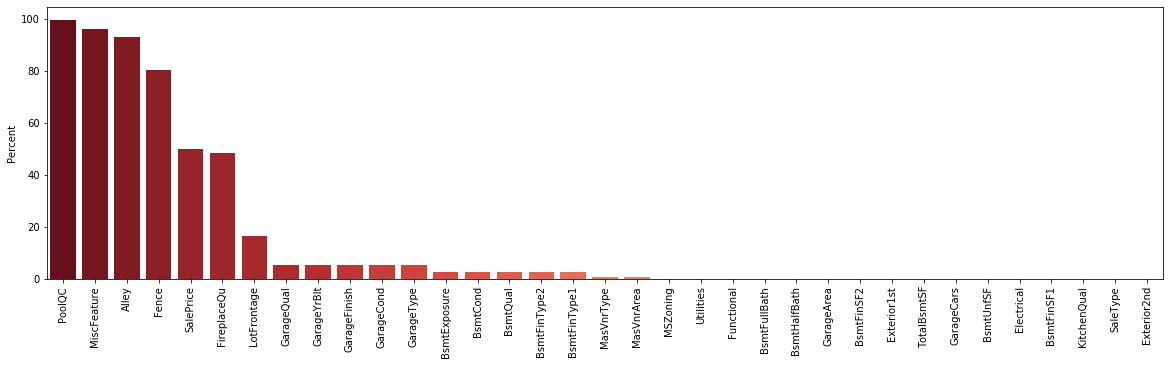

In [9]:
# Checking 'NaN' values.

missing = missing_percentage(features)

fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x=missing.index, y='Percent', data=missing, palette='Reds_r')
plt.xticks(rotation=90)

display(missing.T.style.background_gradient(cmap='Reds', axis=1))

In [10]:
# List of 'NaN' including columns where NaN's mean none.

none_cols = [
    'Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'
]

# List of 'NaN' including columns where NaN's mean 0.

zero_cols = [
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
    'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea'
]

# List of 'NaN' including columns where NaN's actually missing gonna replaced with mode.

freq_cols = [
    'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual',
    'SaleType', 'Utilities'
]

# Filling the list of columns above with appropriate values:

for col in zero_cols:
    features[col].replace(np.nan, 0, inplace=True)

for col in none_cols:
    features[col].replace(np.nan, 'None', inplace=True)

for col in freq_cols:
    features[col].replace(np.nan, features[col].mode()[0], inplace=True)

In [11]:
# Filling 'MSZoning' according to MSSubClass.

features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].apply(
    lambda x: x.fillna(x.mode()[0]))

In [12]:
# Filling 'MSZoning' according to Neighborhood.

features['LotFrontage'] = features.groupby(
    ['Neighborhood'])['LotFrontage'].apply(lambda x: x.fillna(x.median()))

In [ ]:
pd